## Problem Description
Insurance companies take risks over customers. Risk management is a very important aspect of the insurance industry. Insurers consider every quantifiable factor to develop profiles of high and low insurance risks. Insurers collect vast amounts of information about policyholders and analyze the data.

As a Data scientist in an insurance company, you need to analyze the available data and predict whether to sanction the insurance or not.

## Dataset Description
A zipped file containing train, test and sample submission files are given. The training dataset consists of data corresponding to 52310 customers and the test dataset consists of 22421 customers. Following are the features of the dataset

- Target: Claim Status (Claim)
- Name of agency (Agency)
- Type of travel insurance agencies (Agency.Type)
- Distribution channel of travel insurance agencies (Distribution.Channel)
- Name of the travel insurance products (Product.Name)
- Duration of travel (Duration)
- Destination of travel (Destination)
- Amount of sales of travel insurance policies (Net.Sales)
- The commission received for travel insurance agency (Commission)
- Age of insured (Age)
- The identification record of every observation (ID)

# Evaluation Metric
The evaluation metric for this task will be **precision_score**.

**=========================================Data Analaysis Begins=========================================**

### Importing Necessary Pacakages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
from seaborn_qqplot import pplot
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score,recall_score,f1_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PowerTransformer

Defining path for data files

In [2]:
train_path='./train.csv'
test_path='./test.csv'

Loading data

In [3]:
df_train=pd.read_csv(train_path)
df_test=pd.read_csv(test_path)

In [102]:
df_train.Claim.value_counts()

0    43590
1     8720
Name: Claim, dtype: int64

Getting intution about data with head and describe

In [12]:
df_train.columns

Index(['ID', 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Age',
       'Claim'],
      dtype='object')

In [11]:
df_test.describe()

,ID,Duration,Net Sales,Commision (in value),Age
count,22421.000000,22421.000000,22421.000000,22421.000000,22421.000000
mean,15499.196646,59.100665,49.446070,12.316924,39.784889
std,2606.751171,114.819397,61.794609,22.957306,13.910773
min,11000.000000,-1.000000,-297.000000,0.000000,1.000000
25%,13236.000000,10.000000,19.800000,0.000000,34.000000
50%,15515.000000,24.000000,29.518868,0.000000,36.000000
75%,17762.000000,58.000000,56.000000,13.630000,43.000000
max,20000.000000,4857.000000,810.000000,283.500000,118.000000


In [12]:
df_train.describe()

,ID,Duration,Net Sales,Commision (in value),Age,Claim
count,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000
mean,6005.745804,58.256108,48.554673,12.219963,39.555725,0.166699
std,2306.450475,109.138708,60.198589,22.847645,13.762473,0.372710
min,2000.000000,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,4015.000000,10.000000,19.800000,0.000000,33.000000,0.000000
50%,6002.000000,24.000000,29.500000,0.000000,36.000000,0.000000
75%,8004.000000,57.000000,55.000000,13.380000,43.000000,0.000000
max,10000.000000,4881.000000,682.000000,262.760000,118.000000,1.000000


# Question to Ask:

- How Duration can be negative, values are in Train and Test Both.
- Amount of Net Sales is in Negative in both Train and Test.


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    52310 non-null  int64  
 1   Agency                52310 non-null  object 
 2   Agency Type           52310 non-null  object 
 3   Distribution Channel  52310 non-null  object 
 4   Product Name          52310 non-null  object 
 5   Duration              52310 non-null  int64  
 6   Destination           52310 non-null  object 
 7   Net Sales             52310 non-null  float64
 8   Commision (in value)  52310 non-null  float64
 9   Age                   52310 non-null  int64  
 10  Claim                 52310 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 4.4+ MB


Above summary shows no column has **"Null"** Values. We can also see there are 6 columns having numerical data and other are categorical data.

## Segregating Numerical and Object data

In [46]:
numerical_cols=df_train.select_dtypes(include=['int64','float64'])
categorical_cols=df_train.select_dtypes(include='object')

In [40]:
df_train.count()

ID                      52310
Agency                  52310
Agency Type             52310
Distribution Channel    52310
Product Name            52310
Duration                52310
Destination             52310
Net Sales               52310
Commision (in value)    52310
Age                     52310
Claim                   52310
dtype: int64

In [61]:
numerical_cols.Duration[numerical_cols.Duration>300].value_counts().sum()

3148

In [64]:
lower, upper = numerical_cols['Duration'].quantile([0.05, 0.95]).values

In [83]:
#Calculation for getting outliers
for i in numerical_cols.columns:
    lower_count=numerical_cols[numerical_cols[i]<lower][i].count()
    upper_count=numerical_cols[numerical_cols[i]>upper][i].count()
    tota_lu_count=lower_count+upper_count
    total_count=numerical_cols[i].count()
    per=tota_lu_count/total_count
    print("For:",i,"-->","Lower is:",lower_count,"Upper is:",upper_count,"Percentage:",per*100)


For: ID --> Lower is: 0 Upper is: 52310 Percentage: 100.0
For: Duration --> Lower is: 1695 Upper is: 2608 Percentage: 8.225960619384438
For: Net Sales --> Lower is: 2151 Upper is: 200 Percentage: 4.494360542917224
For: Commision (in value) --> Lower is: 27010 Upper is: 0 Percentage: 51.634486713821445
For: Age --> Lower is: 6 Upper is: 0 Percentage: 0.011470082202255783
For: Claim --> Lower is: 52310 Upper is: 0 Percentage: 100.0


In [50]:
for i in numerical_cols.columns:
    print("Percentage for:",i,"-->",df_train[df_train[i]>df_train[i].mean()][i].count()/df_train[i].count())

Percentage for: ID --> 0.4994838463008985
Percentage for: Duration --> 0.24591856241636398
Percentage for: Net Sales --> 0.29028866373542345
Percentage for: Commision (in value) --> 0.27226151787421143
Percentage for: Age --> 0.297266297075129
Percentage for: Claim --> 0.16669852800611737


In [51]:
#np.quantile(df_train_logtransformed,q = [0.1, 0.2, 0.3])
seq = np.linspace(0,1,101)
pd.DataFrame(df_train.Duration.quantile(seq)).T

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,...,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.00
Duration,-2.0,1.0,2.0,2.0,3.0,3.0,4.0,4.0,4.0,5.0,...,152.0,178.0,217.0,305.46,364.0,365.0,367.0,371.0,381.0,4881.0


### With above information and basic analysis we can conclude following:
- **ID:** Numerical value for reference, No significane in stastical analysis.
- **Duration:** 
    - has values in negative. Which is not possible, Time can't be in negative. This will need further analysis as how many occurances of such data.
    - has High Variance
    - Standard Deviation of 109 against mean 58 suggest data is largely dispersed
- **Net Sales:**
    - Has Values in negative. Need more investigation.
    - Data is releativley clsoer to mean
    - variance is high
- **Commision (in value):**
    - closer to mean
    - no negative value
    - 50% data has value as 0
- **Age:**
    - Age having Min as 0 suggests unit is in years.
    - Standard Deviation is low suggest data is closer to mean.
- **Claim:**
    - Boolean value and is target Variable
    

In [32]:
numerical_cols = numerical_cols.copy()
#Droping ID from Numerical Columns
numerical_cols.drop(columns=["ID","Claim"],axis=1,inplace=True)

In [21]:
# Changing Value of DUration from negative to Positive

#numerical_cols['Duration'][numerical_cols.Duration<0]=numerical_cols['Duration'][numerical_cols.Duration<0]*-1
#df_train['Duration'][df_train.Duration<0]=df_train['Duration'][df_train.Duration<0]*-1

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
#Use this to replace value.
numerical_cols.loc[numerical_cols['Net Sales'] < 0.0, 'Commision (in value)']

104       77.22
147        0.00
190       41.58
485       97.25
587       41.58
          ...  
52023     17.82
52119    166.32
52154     41.58
52163      0.00
52242      0.00
Name: Commision (in value), Length: 503, dtype: float64

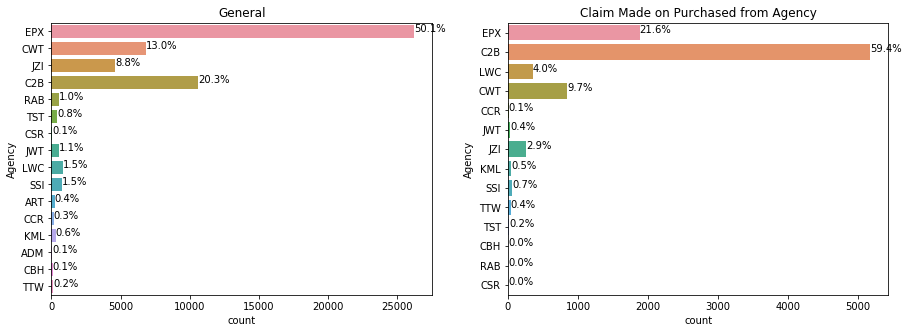

In [101]:
total_claim=len(df_train[df_train.Claim==1].Claim)
total=len(df_train.Claim)
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15,5)
axes[0].set_title('General')
axes[1].set_title('Claim Made on Purchased from Agency')
gplot= sns.countplot(y="Agency", data=df_train, ax = axes[0])
splot=sns.countplot(y="Agency", data=df_train[df_train.Claim==1], ax = axes[1])
for p in splot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total_claim)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        splot.annotate(percentage, (x, y))
for p in gplot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        gplot.annotate(percentage, (x, y))


In [86]:
df_train[df_train.Claim==1].count()

ID                      8720
Agency                  8720
Agency Type             8720
Distribution Channel    8720
Product Name            8720
Duration                8720
Destination             8720
Net Sales               8720
Commision (in value)    8720
Age                     8720
Claim                   8720
dtype: int64

Since there are only 4 values, assuming this is typo mistake removing - sign

In [26]:
#Checking if Negative values are converted
#numerical_cols[numerical_cols.Duration<0] # Not doing this since there is no effect in modal, as well as this is low data.

df_train[df_train.Duration<0]

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
11523,9450,JZI,Airlines,Online,Basic Plan,-1,INDONESIA,18.0,6.3,118,0
15949,7015,JZI,Airlines,Online,Basic Plan,-1,BRUNEI DARUSSALAM,18.0,6.3,118,0
33398,4193,JZI,Airlines,Online,Basic Plan,-1,MALAYSIA,18.0,6.3,118,0
41424,7763,JZI,Airlines,Online,Basic Plan,-2,BANGLADESH,22.0,7.7,118,0


In [31]:
df_train.Duration

0         61
1          4
2         26
3         15
4         15
        ... 
52305    365
52306      8
52307     38
52308      2
52309    414
Name: Duration, Length: 52310, dtype: int64

## Opeartion on Numerical Data
### Checking skewness 

In [33]:
skew_check={}
for i in numerical_cols.columns:
    skew_check[i]=numerical_cols[i].skew()

In [34]:
skew_check

{'Duration': 15.3525235978114,
 'Net Sales': 2.811837338046441,
 'Commision (in value)': 3.5356943446774736,
 'Age': 2.9478911827909426}

Above value shows All numerical data is **postive skewed**.Applying Transformation techniques for data to follow **Guassian distribution**

#### Log Transformation

In [35]:
numerical_cols.Duration.min()
numerical_cols['Net Sales'][numerical_cols['Net Sales']<0]

-2

In [36]:
df_train_logtransformed=pd.DataFrame() #Creating an empty Dataframe for storing log trnasformed values
for i in numerical_cols.columns:
    if any(df_train[i]<=0):
        df_train_logtransformed[i]=np.log(df_train[i]+(df_train[i].min()*-1)+1) # adding minimum to remove -ve and adding 1 for handling 0 values.
    else:
        df_train_logtransformed[i]=np.log(df_train[i])

In [37]:
df_train_logtransformed.skew()

Duration                0.534140
Net Sales              -0.798505
Commision (in value)    0.492381
Age                     0.764090
dtype: float64

### Square root Transformation

In [21]:
df_train_sqrttransformed=pd.DataFrame() #Creating an empty Dataframe for storing Square root trnasformed values
for i in numerical_cols.columns:
    df_train_sqrttransformed[i]=np.sqrt(df_train[i])

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [22]:
df_train_sqrttransformed.skew()

Duration                2.052995
Net Sales               1.477936
Commision (in value)    1.194426
Age                     1.855245
dtype: float64

Since Skewness has not improved significently hence attempting Cube root.

### Cube root transformation

In [23]:
df_train_Qroot_ttransformed=pd.DataFrame() #Creating an empty Dataframe for storing Square root trnasformed values
for i in numerical_cols.columns:
    df_train_Qroot_ttransformed[i]=df_train[i]**(1/3)

In [24]:
df_train_Qroot_ttransformed.skew()

Duration                1.295924
Net Sales               0.525356
Commision (in value)    0.595859
Age                     1.476667
dtype: float64

Comparing three transformation results, it is evident log tranformation serves our purpose and approches closer to Gaussian Distribution.
Proceeding ahead with **"Log Transformed Data"**

### Outliers Detection

Plotting Box plot to check for outliers in the trnasformed data set.

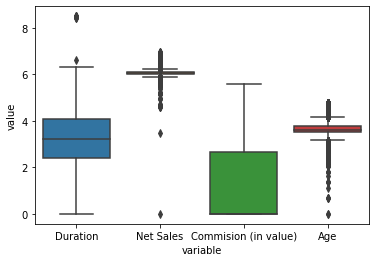

In [25]:
sns.boxplot(x="variable", y="value", data=pd.melt(df_train_logtransformed))

In [51]:
#np.quantile(df_train_logtransformed,q = [0.1, 0.2, 0.3])
seq = np.linspace(0,1,101)
pd.DataFrame(df_train['Net Sales'].quantile(seq)).T

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,...,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.00
Net Sales,-389.0,0.0,0.0,0.0,2.12,9.9,10.0,10.0,10.0,10.0,...,112.0,112.0,128.7,164.069017,201.598537,216.0,246.901143,252.85,291.75,682.0


In [75]:
(df_train[df_train['Net Sales']>164].count()[0]/df_train.count()[0])*100

542

In [68]:
df_train['Net Sales'].describe()

count    52310.000000
mean        48.554673
std         60.198589
min       -389.000000
25%         19.800000
50%         29.500000
75%         55.000000
max        682.000000
Name: Net Sales, dtype: float64

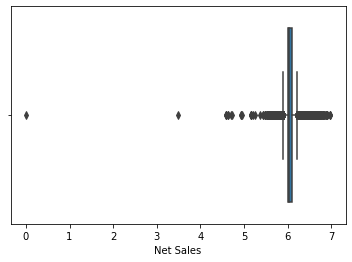

In [26]:
sns.boxplot(df_train_logtransformed['Net Sales'])

In [76]:
df_train_logtransformed.describe()

,Duration,Net Sales,Commision (in value),Age
count,52310.000000,52310.000000,52310.000000,52310.000000
mean,3.416515,6.075546,1.403747,3.660223
std,1.108193,0.123516,1.548649,0.277686
min,0.000000,0.000000,0.000000,0.000000
25%,2.564949,6.015669,0.000000,3.526361
50%,3.295837,6.039064,0.000000,3.610918
75%,4.094345,6.098074,2.665838,3.784190
max,8.493720,6.977281,5.575040,4.779123


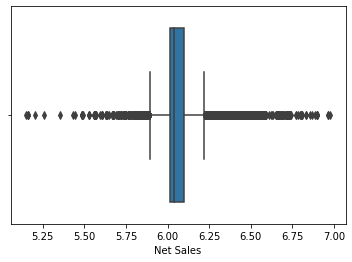

In [28]:
sns.boxplot(df_train_logtransformed['Net Sales'][df_train_logtransformed['Net Sales']>5])

In [29]:
df_train_logtransformed['Net Sales'][df_train_logtransformed['Net Sales']>6.5]

53       6.732509
74       6.524663
376      6.524663
378      6.677083
385      6.524663
           ...   
52027    6.659176
52069    6.583409
52184    6.570042
52253    6.567727
52305    6.727133
Name: Net Sales, Length: 644, dtype: float64

Above analysis suggests that there are outliers which needs treatmeant. Since number of data is more than 7K thus can't classify as outliers. Trying scaling techniques.

#### Scaling Data

In [84]:
ar_train_power=PowerTransformer(method='yeo-johnson').fit_transform(numerical_cols)

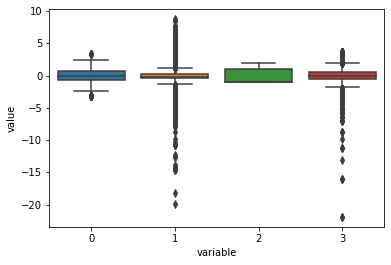

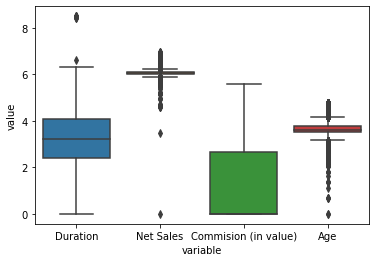

In [31]:
sns.boxplot(x="variable", y="value", data=pd.melt(pd.DataFrame(ar_train_power)))
plt.show()
sns.boxplot(x="variable", y="value", data=pd.melt(df_train_logtransformed))

In [85]:
col_names=numerical_cols.columns #Getting column names for changing names in power transformed data
list(col_names)
df_train_power=pd.DataFrame(ar_train_power,columns=list(col_names))


In [33]:
df_train_power.head()

,Duration,Net Sales,Commision (in value),Age
0,0.725818,-0.600716,-0.949131,0.315168
1,-1.467900,-0.503455,-0.949131,-0.248013
2,0.063295,-0.450443,0.883540,0.785661
3,-0.383714,-0.317732,-0.949131,0.856913
4,-0.383714,-0.139885,-0.949131,-0.146309


###  Checking Correlation between Feature

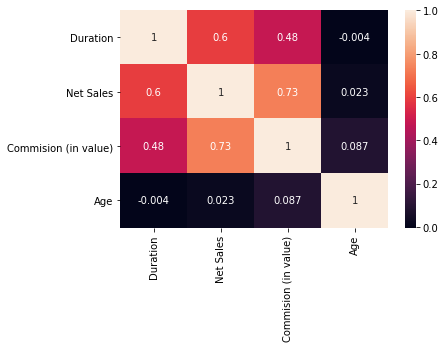

In [34]:
sns.heatmap(numerical_cols.corr(),annot=True)
plt.show()

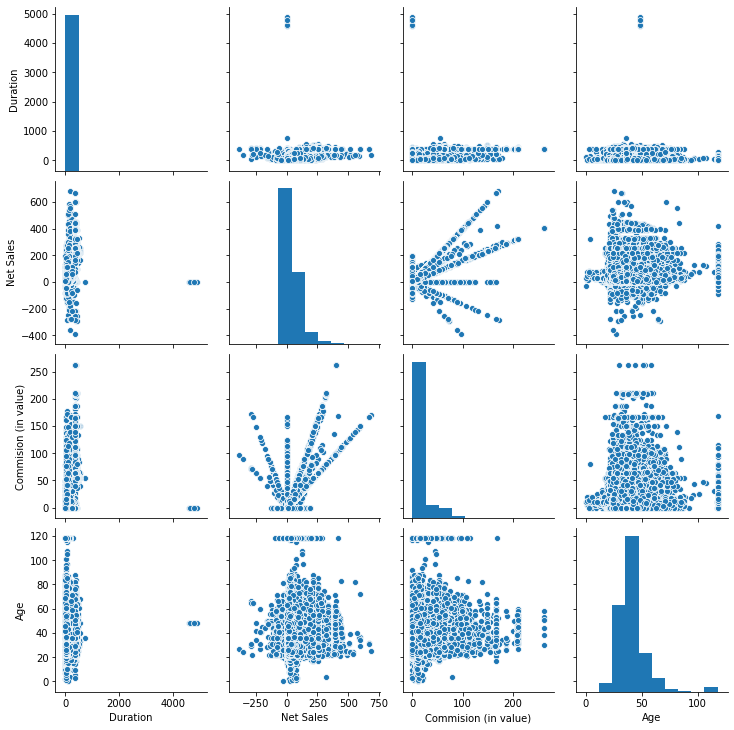

In [35]:
sns.pairplot(numerical_cols)

Heatmap & pairplot of correlation matrix above suggest there is correlation between "Net Sales" & "Commison", however they are not highly correlated hence **can't drop**.

All the numerical Features are independent in nature.

## Opeartion on Categorical Data

In [36]:
categorical_cols.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Destination'],
      dtype='object')

In [77]:
for i in categorical_cols:
    print("Column {} has {} unique values".format(i,len(categorical_cols[i].value_counts())))

Column Agency has 16 unique values
Column Agency Type has 2 unique values
Column Distribution Channel has 2 unique values
Column Product Name has 25 unique values
Column Destination has 97 unique values


Analysing above data it suggests columns **"Agency Type"** & **"Agency"** are of Boolean in nature.However rest 3 columns are of Non Boolean in nature hence opting for **LabelEncoding**.

In [78]:
le=preprocessing.LabelEncoder() #Intialising LabelEncoder Model
df_train_enc=pd.DataFrame() #Creating Empty Dataframe to store encoded Values
for i in (categorical_cols.columns): #Looping through to encode each columns
    df_train_enc[i] = le.fit_transform(df_train[i])

In [79]:
df_train_enc.head() #Checking for encoded values

,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,7,1,1,10,68
1,7,1,1,10,53
2,6,1,1,16,84
3,7,1,1,1,33
4,7,1,1,1,53


Merging dataframes (Encoded +Tranformed)

In [81]:
df_train_cleaned=pd.concat([df_train_logtransformed,df_train_enc],axis=1) #Adding both dataframes

In [86]:
df_train_clean_power=pd.concat([df_train_power,df_train_enc],axis=1) #Adding both dataframes

In [42]:
df_train_cleaned.head()
#df_train_clean_power['Net Sales'].min()

,Duration,Net Sales,Commision (in value),Age,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,4.127134,5.996452,0.000000,3.737670,7,1,1,10,68
1,1.609438,6.008813,0.000000,3.583519,7,1,1,10,53
2,3.295837,6.015669,2.555676,3.871201,6,1,1,16,84
3,2.772589,6.033086,0.000000,3.891820,7,1,1,1,33
4,2.772589,6.056784,0.000000,3.610918,7,1,1,1,53


### Applying Feature Selection Technique

Duration


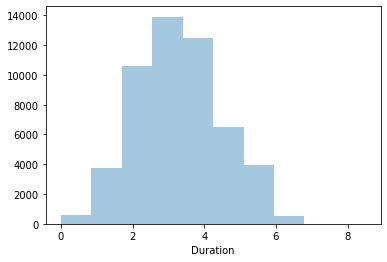

Net Sales


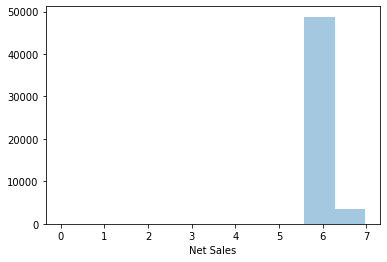

Commision (in value)


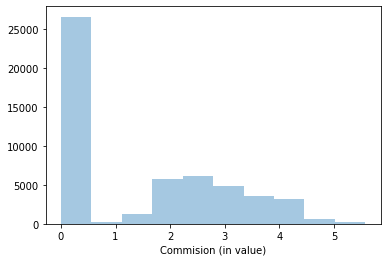

Age


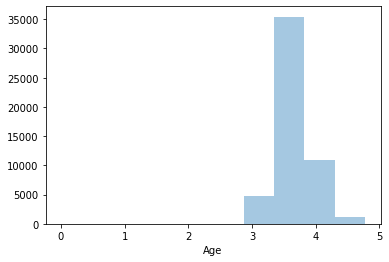

Agency


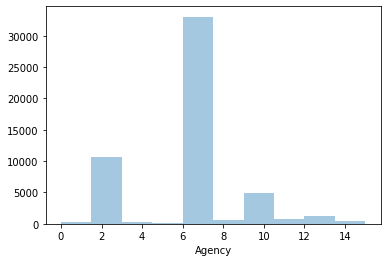

Agency Type


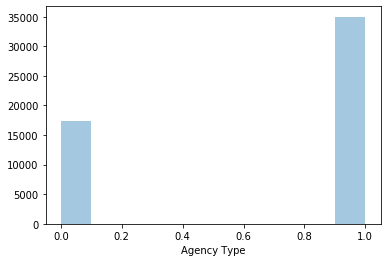

Distribution Channel


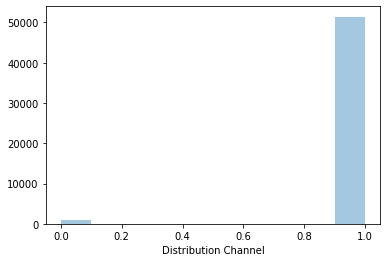

Product Name


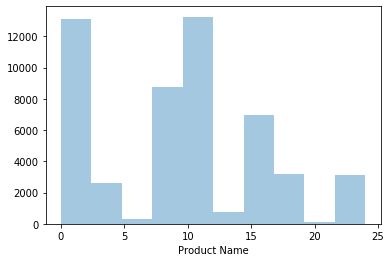

Destination


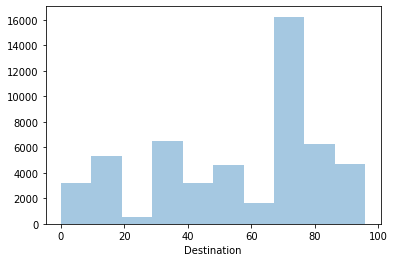

In [43]:
for i in df_train_cleaned.columns:
    print(i)
    sns.distplot(df_train_cleaned[i],bins=10,kde=False)
    plt.show()

In [44]:
df_train_cleaned['Distribution Channel'].value_counts()

1    51419
0      891
Name: Distribution Channel, dtype: int64

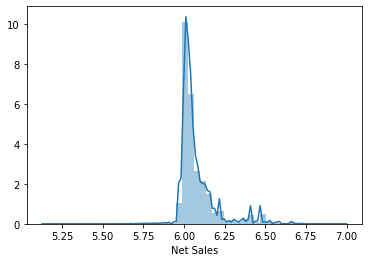

In [46]:
#df_train[df_train['Net Sales']<0]['Net Sales'].count()
sns.distplot(df_train_cleaned[df_train_cleaned['Net Sales']>5]['Net Sales'])

In [88]:
clean_skew=df_train_cleaned.skew()
log_skew=df_train_logtransformed.skew()
print(clean_skew,"\n+++++\n",log_skew)
df_train.skew()

Duration                0.534140
Net Sales              -0.798505
Commision (in value)    0.492381
Age                     0.764090
Agency                 -0.097111
Agency Type            -0.718350
Distribution Channel   -7.465242
Product Name            0.332685
Destination            -0.590582
dtype: float64 
+++++
 Duration                0.534140
Net Sales              -0.798505
Commision (in value)    0.492381
Age                     0.764090
dtype: float64


ID                      -0.001854
Duration                15.352524
Net Sales                2.811837
Commision (in value)     3.535694
Age                      2.947891
Claim                    1.788598
dtype: float64

## Model Building

### Splliting data in Feature and Target variable

In [89]:
#Data with Log Transformed
X=df_train_cleaned #Features
y=df_train['Claim'] #Target

In [90]:
#Power transformed data
X_power=df_train_clean_power #Features
y_power=df_train['Claim'] #Target

In [91]:
# Train Test Split Log Transformed Data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [92]:
# Train Test Split power Transformed Data
X_train,X_test,y_train,y_test=train_test_split(X_power,y_power,test_size=0.2,random_state=3)

In [93]:
#Checking for shape of Training data
print("Shape of X Train:",X_train.shape," & Y Train is ",y_train.shape)

Shape of X Train: (41848, 9)  & Y Train is  (41848,)


### Model Selection

#### LogisticRegression

**Note** Normalize your training data so that the problem hopefully becomes more well conditioned, which in turn can speed up convergence. One possibility is to scale your data to 0 mean, unit standard deviation using Scikit-Learn's StandardScaler for an example. Note that you have to apply the StandardScaler fitted on the training data to the test data.

In [113]:

perf_report=pd.DataFrame()
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
lr_score=accuracy_score(y_test,y_pred)
lr_precision_score=precision_score(y_test,y_pred)

#print("Accuracy Score is:{} & Precision Score is:{}".format(lr_score,lr_precision_score))
perf_report = pd.concat([perf_report, pd.DataFrame([{'model':'Logistic',
                                             'Accuracy': accuracy_score(y_test,y_pred), 
                                            'Precision': precision_score(y_test,y_pred),
                                            'Recall': recall_score(y_test,y_pred),
                                                    'F1':f1_score(y_test,y_pred)}])])
#Print classification report
#print(classification_report(y_test, y_pred))

C:\Users\mrityunjay1.pandey\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [114]:
perf_report

,model,Accuracy,Precision,Recall,F1
0,Logistic,0.848021,0.59472,0.223715,0.325127


In [57]:
from sklearn.metrics import classification_report

#### Trying Decision Tree

In [115]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
dt_score=accuracy_score(y_test,y_pred)
dt_precision_score=precision_score(y_test,y_pred)

perf_report = pd.concat([perf_report, pd.DataFrame([{'model':'Decision Tree',
                                             'Accuracy': accuracy_score(y_test,y_pred), 
                                            'Precision': precision_score(y_test,y_pred),
                                            'Recall': recall_score(y_test,y_pred),
                                                    'F1':f1_score(y_test,y_pred)}])])

#### Trying Random Forest

In [116]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
rf_score=accuracy_score(y_test,y_pred)
rf_precision_score=precision_score(y_test,y_pred)
perf_report = pd.concat([perf_report, pd.DataFrame([{'model':'Random Forest',
                                             'Accuracy': accuracy_score(y_test,y_pred), 
                                            'Precision': precision_score(y_test,y_pred),
                                            'Recall': recall_score(y_test,y_pred),
                                                    'F1':f1_score(y_test,y_pred)}])])

#### Trying XG Boost

In [117]:
xgb=XGBClassifier(base_estimator=rf,random_state=3)
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
xgb_score=accuracy_score(y_test,y_pred)
xgb_precision_score=precision_score(y_test,y_pred)

perf_report = pd.concat([perf_report, pd.DataFrame([{'model':'XG Boost',
                                             'Accuracy': accuracy_score(y_test,y_pred), 
                                            'Precision': precision_score(y_test,y_pred),
                                            'Recall': recall_score(y_test,y_pred),
                                                    'F1':f1_score(y_test,y_pred)}])])

[08:57:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [118]:
perf_report

,model,Accuracy,Precision,Recall,F1
0,Logistic,0.848021,0.594720,0.223715,0.325127
0,Decision Tree,0.918371,0.745423,0.761098,0.753179
0,Random Forest,0.943797,0.854798,0.790888,0.821602
0,XG Boost,0.927643,0.813115,0.724299,0.766141


## Queries:

1.Can commision be in negative or have value even if sales is 0?